## Table of Contents

- Importing Libraries
- Importing Dataframes
- Exploring Dataframes
- Subsetting and Wrangling Time Series Data
- Answering Other Key Questions

## Importing Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
%matplotlib inline

## Importing Dataframes

In [3]:
# Define path
path = r'/Users/isaacotubanjo/Documents/US Gun Violence Analysis'

In [4]:
path

'/Users/isaacotubanjo/Documents/US Gun Violence Analysis'

In [5]:
# Importing dataframe using os path
df_gun = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_gun_violence_data2.pkl'))

## Exploring Dataframes

In [6]:
df_gun.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address',
       'number_killed', 'number_injured', 'congressional_district',
       'gun_stolen', 'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'number_guns_involved',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_status', 'participant_type', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [7]:
df_gun.shape

(231432, 22)

In [8]:
df_gun.head()

,incident_id,date,state,city_or_county,address,number_killed,number_injured,congressional_district,gun_stolen,gun_type,...,location_description,longitude,number_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,NaN,NaN,...,NaN,-79.8559,1.3,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,55.5,20.5
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,NaN,NaN,...,NaN,-118.3330,1.3,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,Cotton Club,-82.1377,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,NaN,NaN,...,NaN,-104.8020,1.3,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,NaN,-79.9569,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0


In [9]:
# Answering the key question 'What types of firearms are most involved in incidents?'
df_gun['gun_type'].value_counts(dropna=False)

NaN                                                                                                                            99263
0::Unknown                                                                                                                     87385
0::Handgun                                                                                                                     12500
0::9mm                                                                                                                          4422
0::Unknown||1::Unknown                                                                                                          2268
                                                                                                                               ...  
0::Handgun||1::Handgun||2::Handgun||3::Handgun||4::12 gauge||5::22 LR||6::30-30 Win||7::Rifle                                      1
0::357 Mag||1::22 LR||2::12 gauge||3::9mm                            

There are a lot of missing values in this column and also there are a lot of instances where the type of firearm is unknown.

The most common type of firearm is the handgun which is then followed by the 9mm.

## Subsetting and Wrangling Time Series Data

In [12]:
# To answer the key question 'How has the number of gun-related incidents changed over the years?', we can create subsets of the dataframe and look at the trends
# First check the datatype for the date column
df_gun['date'].dtype

dtype('O')

In [13]:
# Changing the date column to datetime datatype
df_gun['date']=df_gun['date'].astype('datetime64')

In [14]:
# Checking results
df_gun['date'].dtype

dtype('<M8[ns]')

In [15]:
# Creating subsets for number_killed, number_injured and number_guns_involved columns
date_count = df_gun.groupby(df_gun['date'].dt.date)['date'].count()

In [16]:
date_count

date
2013-01-01      3
2013-01-05      1
2013-01-07      2
2013-01-19      1
2013-01-21      2
             ... 
2018-03-27     94
2018-03-28    123
2018-03-29     95
2018-03-30     84
2018-03-31     85
Name: date, Length: 1725, dtype: int64

In [18]:
# Average number_killed per day
avg_number_killed_daily = df_gun.groupby('date')['number_killed'].mean()

In [19]:
avg_number_killed_daily

date
2013-01-01    0.666667
2013-01-05    4.000000
2013-01-07    3.000000
2013-01-19    5.000000
2013-01-21    0.000000
                ...   
2018-03-27    0.159574
2018-03-28    0.235772
2018-03-29    0.294737
2018-03-30    0.357143
2018-03-31    0.505882
Name: number_killed, Length: 1725, dtype: float64

In [20]:
# merging both subsets
result = pd.DataFrame({'date': date_count.index, 'date_count': date_count.values, 'avg_number_deaths': avg_number_killed_daily.values})

In [22]:
result.head()

,date,date_count,avg_number_deaths
0,2013-01-01,3,0.666667
1,2013-01-05,1,4.000000
2,2013-01-07,2,3.000000
3,2013-01-19,1,5.000000
4,2013-01-21,2,0.000000


In [23]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               1725 non-null   object 
 1   date_count         1725 non-null   int64  
 2   avg_number_deaths  1725 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 40.6+ KB


In [24]:
# Set the "Date" column as the index

from datetime import datetime

result['datetime'] = pd.to_datetime(result['date']) # Create a datetime column from "Date.""
result = result.set_index('datetime') # Set the datetime as the index of the dataframe.
result.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
result.head()

,date_count,avg_number_deaths
datetime,,
2013-01-01,3,0.666667
2013-01-05,1,4.000000
2013-01-07,2,3.000000
2013-01-19,1,5.000000
2013-01-21,2,0.000000


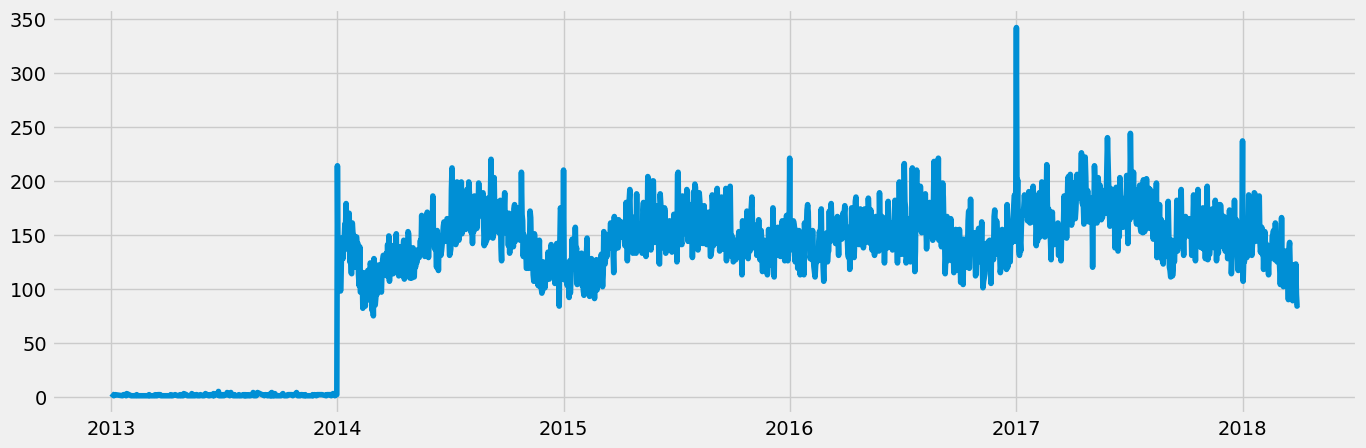

In [25]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(date_count)

In [26]:
# Dropping the date_count column
result1 = result.drop(columns = ['date_count'])

In [27]:
result1.head()

,avg_number_deaths
datetime,
2013-01-01,0.666667
2013-01-05,4.000000
2013-01-07,3.000000
2013-01-19,5.000000
2013-01-21,0.000000


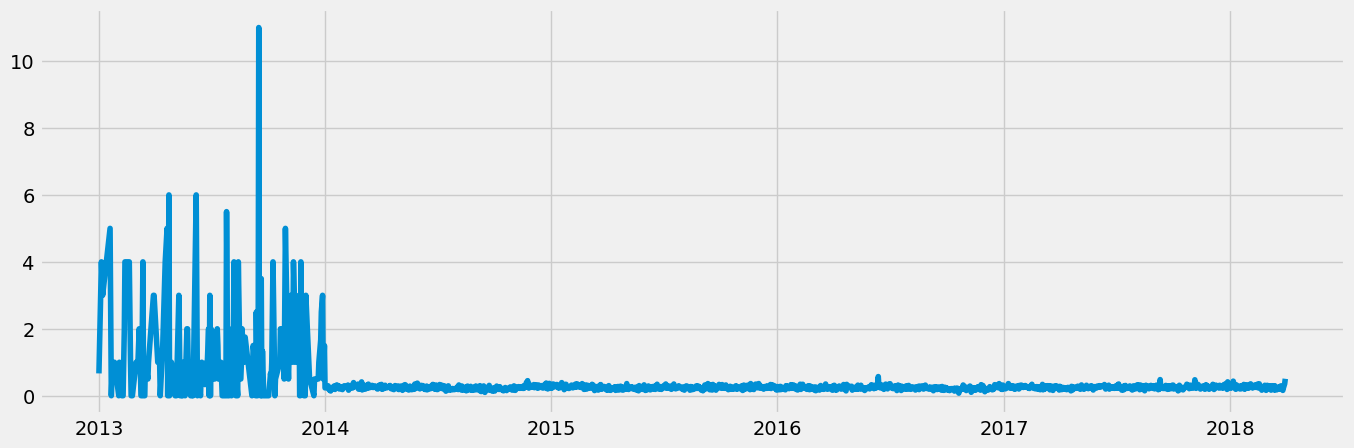

In [29]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(result1)

Looking at this trend, it is noticeable that the average number of deaths seem to be much higher between 2013 and 2014 than the other years represented by the dataframe.

In [30]:
# Average number_injured per day
avg_number_injured_daily = df_gun.groupby('date')['number_injured'].mean()

In [31]:
avg_number_injured_daily

date
2013-01-01    3.333333
2013-01-05    0.000000
2013-01-07    1.000000
2013-01-19    0.000000
2013-01-21    4.500000
                ...   
2018-03-27    0.425532
2018-03-28    0.398374
2018-03-29    0.515789
2018-03-30    0.416667
2018-03-31    0.552941
Name: number_injured, Length: 1725, dtype: float64

In [32]:
# merging both subsets
result2 = pd.DataFrame({'date': date_count.index, 'date_count': date_count.values, 'avg_number_injuries': avg_number_injured_daily.values})

In [33]:
result2.head()

,date,date_count,avg_number_injuries
0,2013-01-01,3,3.333333
1,2013-01-05,1,0.000000
2,2013-01-07,2,1.000000
3,2013-01-19,1,0.000000
4,2013-01-21,2,4.500000


In [34]:
# Set the "Date" column as the index

from datetime import datetime

result2['datetime'] = pd.to_datetime(result2['date']) # Create a datetime column from "Date.""
result2 = result2.set_index('datetime') # Set the datetime as the index of the dataframe.
result2.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
result2.head()

,date_count,avg_number_injuries
datetime,,
2013-01-01,3,3.333333
2013-01-05,1,0.000000
2013-01-07,2,1.000000
2013-01-19,1,0.000000
2013-01-21,2,4.500000


In [35]:
# Dropping the date_count column
result3 = result2.drop(columns = ['date_count'])

In [36]:
result3.head()

,avg_number_injuries
datetime,
2013-01-01,3.333333
2013-01-05,0.000000
2013-01-07,1.000000
2013-01-19,0.000000
2013-01-21,4.500000


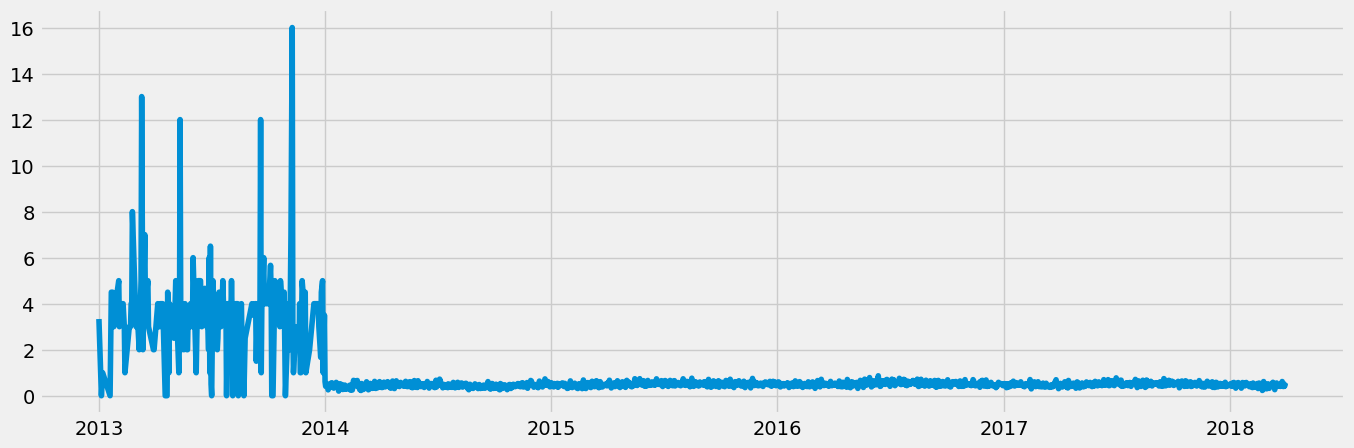

In [37]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(result3)

The overall trend here is also similar to the previous chart as the number of injuries declined sharply from 2014 onwards.

In [38]:
# Average number_guns_involved per day
avg_number_firearms_daily = df_gun.groupby('date')['number_guns_involved'].mean()

In [40]:
avg_number_firearms_daily

date
2013-01-01    1.533333
2013-01-05    1.300000
2013-01-07    1.650000
2013-01-19    2.000000
2013-01-21    1.300000
                ...   
2018-03-27    1.212766
2018-03-28    1.154472
2018-03-29    1.340000
2018-03-30    1.178571
2018-03-31    1.047059
Name: number_guns_involved, Length: 1725, dtype: float64

In [41]:
# merging both subsets
result4 = pd.DataFrame({'date': date_count.index, 'date_count': date_count.values, 'avg_number_firearms': avg_number_firearms_daily.values})

In [42]:
result4.head()

,date,date_count,avg_number_firearms
0,2013-01-01,3,1.533333
1,2013-01-05,1,1.300000
2,2013-01-07,2,1.650000
3,2013-01-19,1,2.000000
4,2013-01-21,2,1.300000


In [43]:
# Set the "Date" column as the index

from datetime import datetime

result4['datetime'] = pd.to_datetime(result4['date']) # Create a datetime column from "Date.""
result4 = result4.set_index('datetime') # Set the datetime as the index of the dataframe.
result4.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
result4.head()

,date_count,avg_number_firearms
datetime,,
2013-01-01,3,1.533333
2013-01-05,1,1.300000
2013-01-07,2,1.650000
2013-01-19,1,2.000000
2013-01-21,2,1.300000


In [44]:
# Dropping the date_count column
result5 = result4.drop(columns = ['date_count'])

In [45]:
result5.head()

,avg_number_firearms
datetime,
2013-01-01,1.533333
2013-01-05,1.300000
2013-01-07,1.650000
2013-01-19,2.000000
2013-01-21,1.300000


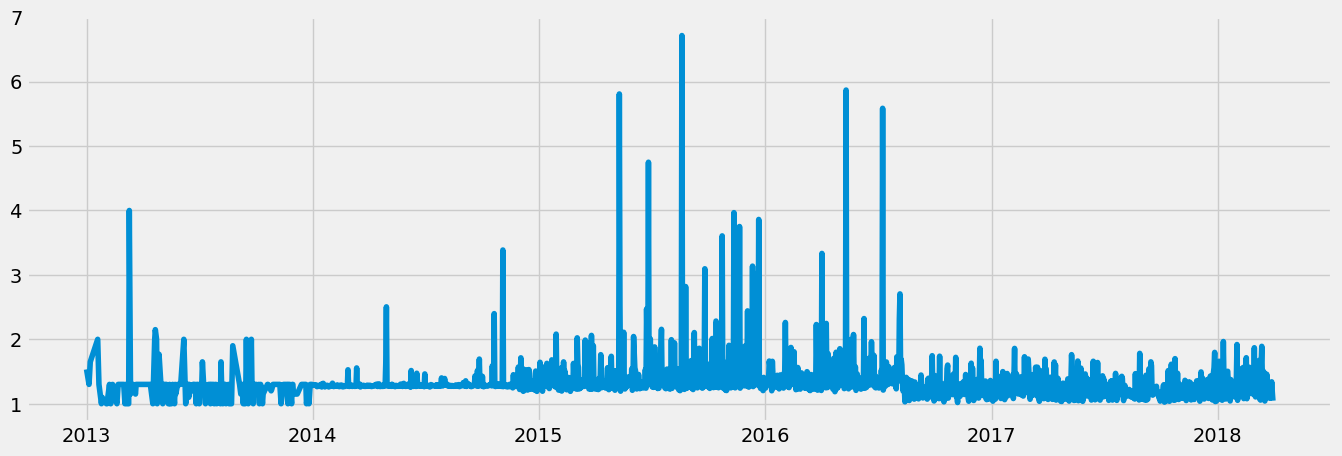

In [46]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(result5)

The trend here looks different from the previous charts as there are peaks at different periods in the timeframe. The period with the highest instances of firearms involvement overall seems to be between 2015 to mid-2016. There seems to be an overall drop and more stable instances from mid 2016 till 2018

## Answering Other Key Questions

In [47]:
# Answering the key question 'Are there demographic patterns in the victims and perpetrators of gun violence (age, gender)?'
df_gun['participant_age'].value_counts(dropna=False)

NaN                                  90242
0::24                                 3695
0::22                                 3609
0::23                                 3606
0::19                                 3597
                                     ...  
0::23||1::19||2::15                      1
0::17||1::8                              1
0::45||1::23||2::21||3::19               1
0::27||1::20||2::17||3::16||4::16        1
0::56||1::59||2::58                      1
Name: participant_age, Length: 18173, dtype: int64

The majority of gun violence perpetrators seems to be between the ages of 19 to 24.

In [48]:
df_gun['participant_gender'].value_counts(dropna=False)

0::Male                                                                                         90565
0::Male||1::Male                                                                                41559
NaN                                                                                             35538
0::Male||1::Male||2::Male                                                                       11824
0::Female||1::Male                                                                              10177
                                                                                                ...  
0::Female||7::Male                                                                                  1
1::Male||2::Male||3::Female||4::Male||5::Male                                                       1
0::Female||1::Male||2::Female||3::Female||4::Male||5::Male||6::Male||7::Male                        1
7::Male||8::Male                                                                  

Looking at the results, there seems to be an overwhelming majority of incidents involving Males.